In [176]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [177]:
# %run ./func.ipynb
# %run ./func_v2.ipynb
# %run ./func_v3.ipynb
# %run ./func_v3-1.ipynb
# %run ./func_v3-2.ipynb
%run ./func_v4_1.ipynb

In [178]:
D, J = 20,20

# a side of the grid
num_rows_columns = 50
demand_points, candidate_sites = generate_instance(num_rows_columns, D, J, seed=42)

print("Demand Points:")
print(demand_points)

print("\nCandidate Sites:")
print(candidate_sites)

Demand Points:
[(36, 18), (9, 18), (44, 10), (46, 8), (25, 24), (22, 16), (35, 49), (11, 35), (29, 36), (42, 45), (24, 1), (31, 12), (43, 9), (39, 22), (26, 33), (4, 34), (22, 3), (11, 38), (12, 34), (33, 25)]

Candidate Sites:
[(11, 5), (35, 36), (9, 16), (48, 10), (50, 22), (49, 35), (30, 35), (19, 49), (17, 38), (29, 42), (39, 48), (1, 1), (36, 4), (12, 50), (47, 22), (17, 22), (11, 19), (48, 31), (48, 23), (38, 20)]


In [179]:
alpha = 0
beta = 0.1

p = 5
r = 5

h_i = np.full(D, 1 / D)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}


In [180]:
distances = compute_distances(demand_points, candidate_sites)
print("\nDistances:", distances)

# w_ij の計算
wij_matrix = compute_wij_matrix(distances, alpha, beta)
print("\nw_ij Matrix:", wij_matrix)

# U_i^L の計算
Ui_L = compute_Ui_L(wij_matrix, J_L)
print("\nU_i^L:", Ui_L)

# U_i^F の計算
Ui_F = compute_Ui_F(wij_matrix, J_F)
print("\nU_i^F:", Ui_F)


Distances: [[28.17800561 18.02775638 27.07397274 14.4222051  14.56021978 21.40093456
  18.02775638 35.35533906 27.58622845 25.         30.14962686 38.91015292
  14.         40.         11.70469991 19.41648784 25.01999201 17.69180601
  13.          2.82842712]
 [13.15294644 31.6227766   2.         39.81205847 41.19465985 43.46262762
  27.01851217 32.57299495 21.54065923 31.2409987  42.42640687 18.78829423
  30.41381265 32.14031736 38.20994635  8.94427191  2.23606798 41.10960958
  39.3192065  29.06888371]
 [33.37663854 27.51363298 35.51056181  4.         13.41640786 25.49509757
  28.65309756 46.32493929 38.89730068 35.34119409 38.32753579 43.93176527
  10.         51.2249939  12.36931688 29.54657341 34.20526275 21.37755833
  13.60147051 11.66190379]
 [35.12833614 30.08321791 37.85498646  2.82842712 14.56021978 27.16615541
  31.38470965 49.09175083 41.72529209 38.01315562 40.60788101 45.54119015
  10.77032961 54.03702434 14.03566885 32.20248438 36.68787266 23.08679276
  15.13274595 14.42

In [181]:
SEED = 422
np.random.seed(SEED)

x0 = np.random.rand(len(candidate_sites))  # 例: 初期値
y0 = np.random.rand(len(candidate_sites))  # 同じ次元

In [182]:
final_x, final_y, hist_obj, hist_dx, hist_dy, x_bin, y_bin = minmax_solver(x0, y0, wij_matrix, Ui_L, Ui_F, h_i, p, r)


🌸🌸🌸  Iteration 1  🌸🌸🌸


🔧  After rounding:
     ➤ x (rounded): [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
     ➤ x ( binbin): [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
     ➤ y (rounded): [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
     ➤ y ( binbin): [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
📈  Objective L̂(x, y) = 0.613141
🔍  dx = 1.78e+00, dy = 2.80e+00

🌸🌸🌸  Iteration 2  🌸🌸🌸
🔧  After rounding:
     ➤ x (rounded): [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
     ➤ x ( binbin): [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
     ➤ y (rounded): [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
     ➤ y ( binbin): [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
📈  Objective L̂(x, y) = 0.473459
🔍  dx = 1.96e+00, dy = 2.88e+00

🌸🌸🌸  Iteration 3  🌸🌸🌸
🔧  After rounding:
     ➤ x (rounded): [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
     ➤ x ( binbin): [0. 1. 0.

In [183]:
print("\nFinal x values:" ,final_x)
print("\nFinal y values:" ,final_y)
print("\nhistory of objrct:" ,hist_obj)
print("\nx_bin:" ,x_bin)
print("\ny_bin:" ,y_bin)


Final x values: [4.82624285e-01 0.00000000e+00 7.09053879e-01 0.00000000e+00
 8.21765057e-18 0.00000000e+00 7.67894603e-01 2.56244643e-18
 5.61959711e-01 0.00000000e+00 3.42979638e-01 4.73394048e-18
 0.00000000e+00 0.00000000e+00 6.56641849e-01 8.24855460e-17
 0.00000000e+00 4.22054087e-18 6.21789695e-01 8.57056340e-01]

Final y values: [3.01839541e-16 1.00000000e+00 1.51385292e-17 4.98970667e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.16908570e-17 8.03432973e-01 3.97898680e-16 7.29631878e-17
 9.89342099e-01 0.00000000e+00 7.15903914e-18 1.00000000e+00
 7.08254261e-01 2.10918517e-17 3.59177237e-18 0.00000000e+00]

history of objrct: [0.6131406689825613, 0.4734593645892373, 0.5477184060444789, 0.47950893167707004, 0.5477184060444789, 0.47950893167707004, 0.5477184060444789, 0.47950893167707004, 0.5477184060444789, 0.47950893167707004, 0.5477184060444789, 0.47950893167707004, 0.5477184060444789, 0.47950893167707004, 0.5477184060444789, 0.47950893167707004, 0.5477

In [186]:
print('sum x:', np.sum(final_x))
print('sum y:', np.sum(final_y))

sum x: 4.999999999999999
sum y: 5.000000000000002


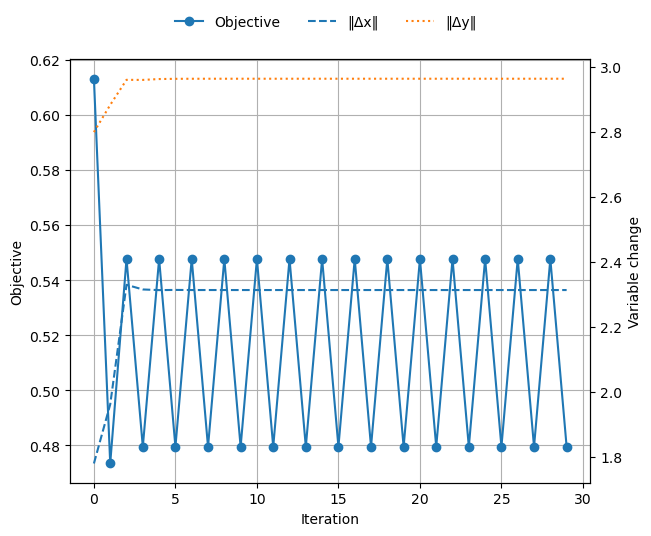

In [184]:
fig, ax1 = plt.subplots(constrained_layout=True)  # 自動レイアウト調整に強い方法

# Plot objective
ax1.plot(hist_obj, label='Objective', marker='o')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective')
ax1.grid(True)

# Plot variable changes on secondary y-axis
ax2 = ax1.twinx()
line_dx, = ax2.plot(hist_dx,  label='‖Δx‖',  ls='--')
line_dy, = ax2.plot(hist_dy,  label='‖Δy‖',  ls=':')
ax2.set_ylabel('Variable change')

# Collect legend handles from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Place legend above the plot (outside)
fig.legend(lines1 + lines2, labels1 + labels2,
           loc='upper center', bbox_to_anchor=(0.5, 1.1),
           ncol=3, frameon=False)

plt.savefig("plot.png", dpi=300, bbox_inches='tight')  # 保存
plt.show()

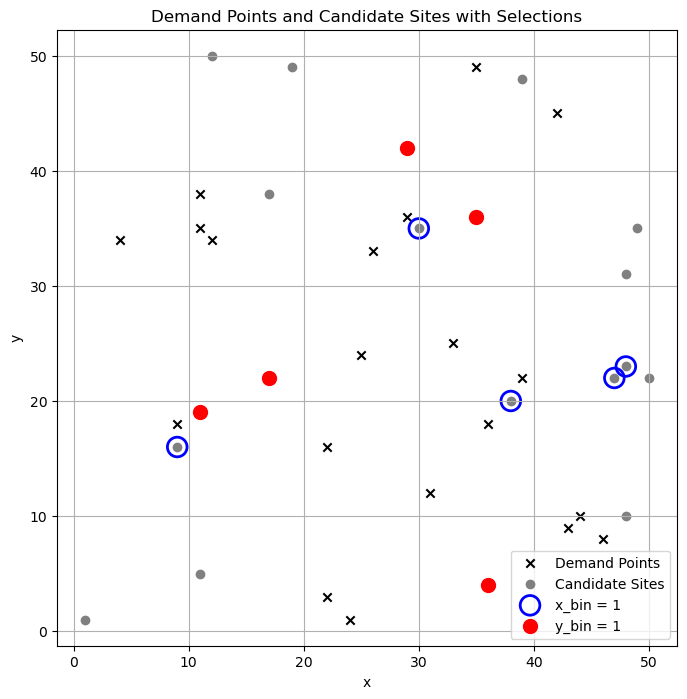

In [185]:
# 座標分解
candidate_x = [pt[0] for pt in candidate_sites]
candidate_y = [pt[1] for pt in candidate_sites]
demand_x = [pt[0] for pt in demand_points]
demand_y = [pt[1] for pt in demand_points]

# プロット開始
plt.figure(figsize=(8, 8))

# 需要点（demand_points）を黒点で表示
plt.scatter(demand_x, demand_y, color='black', marker='x', label='Demand Points')

# 候補地（すべて）をグレーで表示
plt.scatter(candidate_x, candidate_y, color='gray', label='Candidate Sites')

# x_bin == 1 → 青○
for i, val in enumerate(x_bin):
    if val == 1:
        plt.scatter(candidate_sites[i][0], candidate_sites[i][1],
                    s=200, facecolors='none', edgecolors='blue', linewidths=2,
                    label='x_bin = 1' if 'x_bin = 1' not in plt.gca().get_legend_handles_labels()[1] else "")

# y_bin == 1 → 赤●
for i, val in enumerate(y_bin):
    if val == 1:
        plt.scatter(candidate_sites[i][0], candidate_sites[i][1],
                    s=100, color='red',
                    label='y_bin = 1' if 'y_bin = 1' not in plt.gca().get_legend_handles_labels()[1] else "")

# 軸ラベル・グリッド・凡例
plt.xlabel('x')
plt.ylabel('y')
plt.title('Demand Points and Candidate Sites with Selections')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()
